In [1]:
from rtmag.paper.load import load_input_label, MyModel

# Input & Label

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [3]:
idx = 13
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110214_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [4]:
from time import time

In [5]:
mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2")
# mm = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug")

In [6]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

Model loaded from epoch 64
0.9860150814056396 seconds


In [7]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

1.2885217666625977 seconds


In [8]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.4147849082946777 seconds


In [9]:
start_time = time()
dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.004136562347412109 seconds


# Quantitative Evaluation

In [10]:
import numpy as np
from rtmag.paper.metric import evaluate, eps

In [12]:
start_time = time()
res = evaluate(b, B)
print(f"{time() - start_time} seconds")

C_vec     : 0.9595
C_cs      : 0.9552
E_n'      : 0.6997
E_m'      : 0.6334
eps       : 0.9037
2.1236653327941895 seconds


In [13]:
start_time = time()
energy = eps(b, B)
print(energy)
print(f"{time() - start_time} seconds")

0.9036728622055878
0.1733381748199463 seconds


# Qualitative Evaluation

In [90]:
from rtmag.test.diff import curl_np2 as curl
from rtmag.test.eval import vector_norm

In [91]:
j = curl(b)
j_map = vector_norm(j).sum(2)
J = curl(B)
J_map = vector_norm(J).sum(2)

In [ ]:
j = curl(b)
j_map = vector_norm(j).sum(2)

In [92]:
j_map.shape

(512, 256)

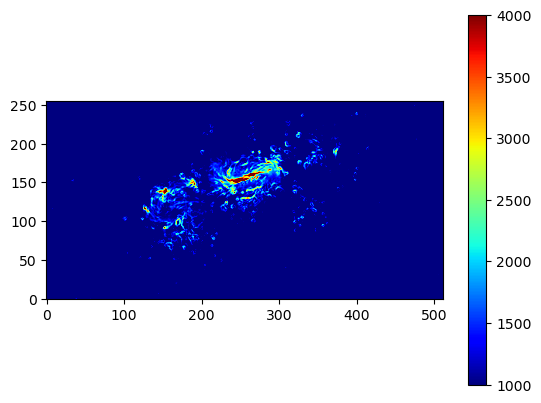

In [93]:
plt.imshow(j_map.T, origin='lower', cmap='jet', vmin=1000, vmax=4000)
plt.colorbar()

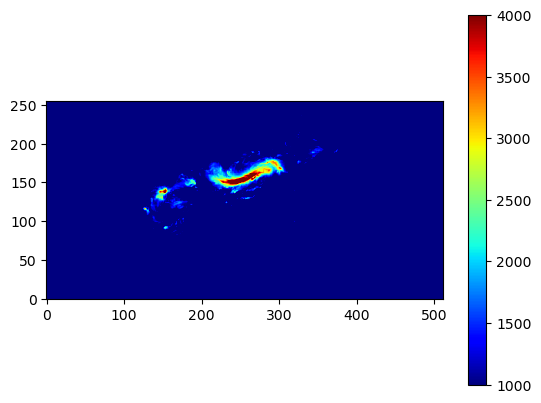

In [94]:
plt.imshow(J_map.T, origin='lower', cmap='jet', vmin=1000, vmax=4000)
plt.colorbar()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

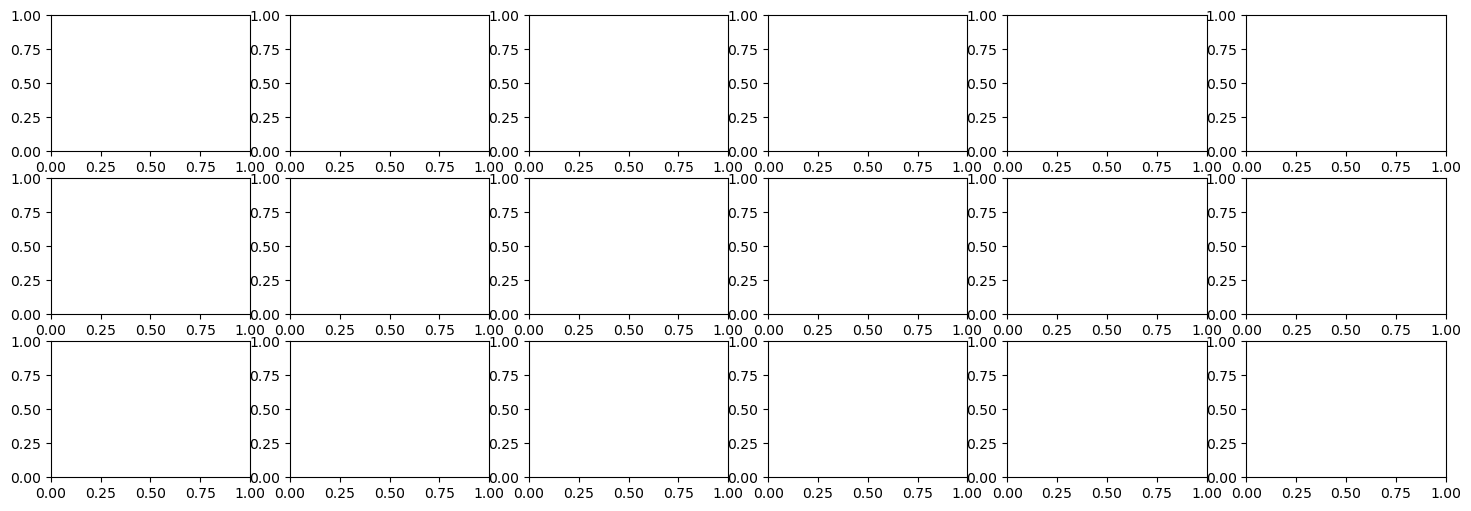

In [46]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 0

# Generate some example data (you'll need your actual data here)
y_true = J_map
y_predicted = j_map
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


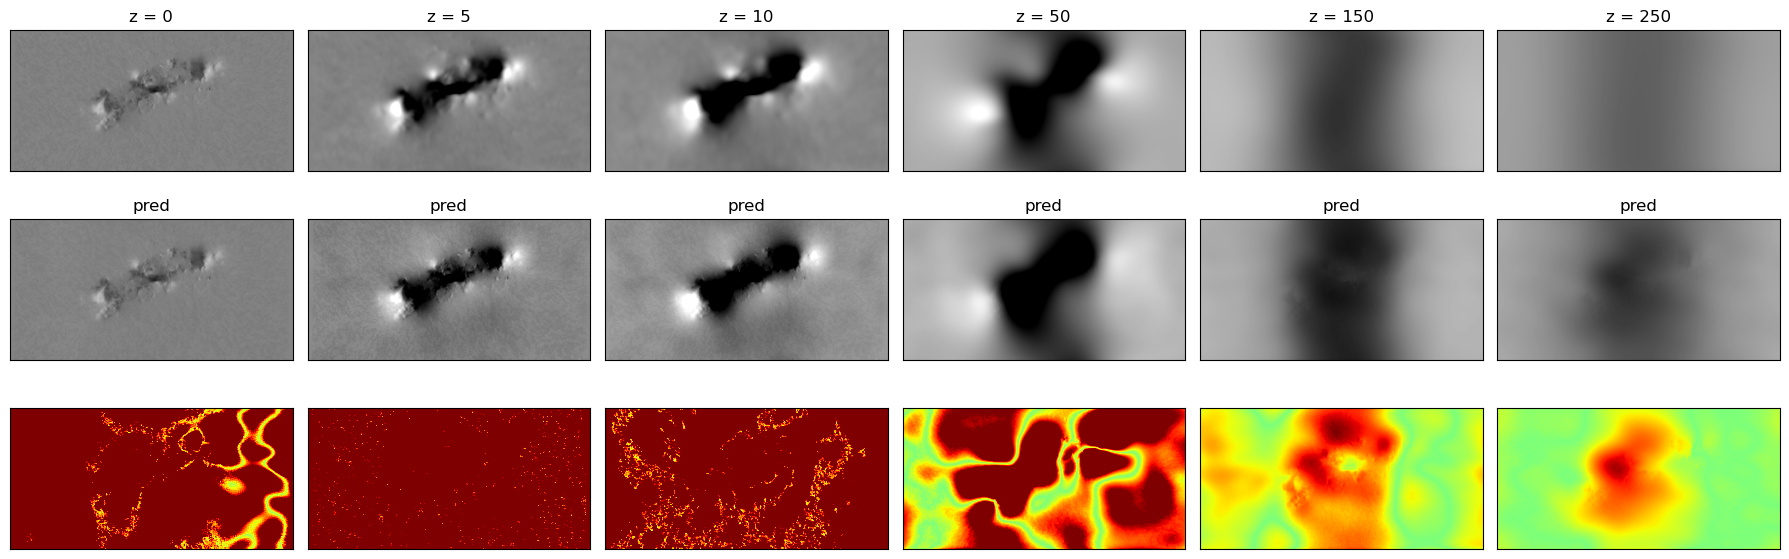

In [33]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 0

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


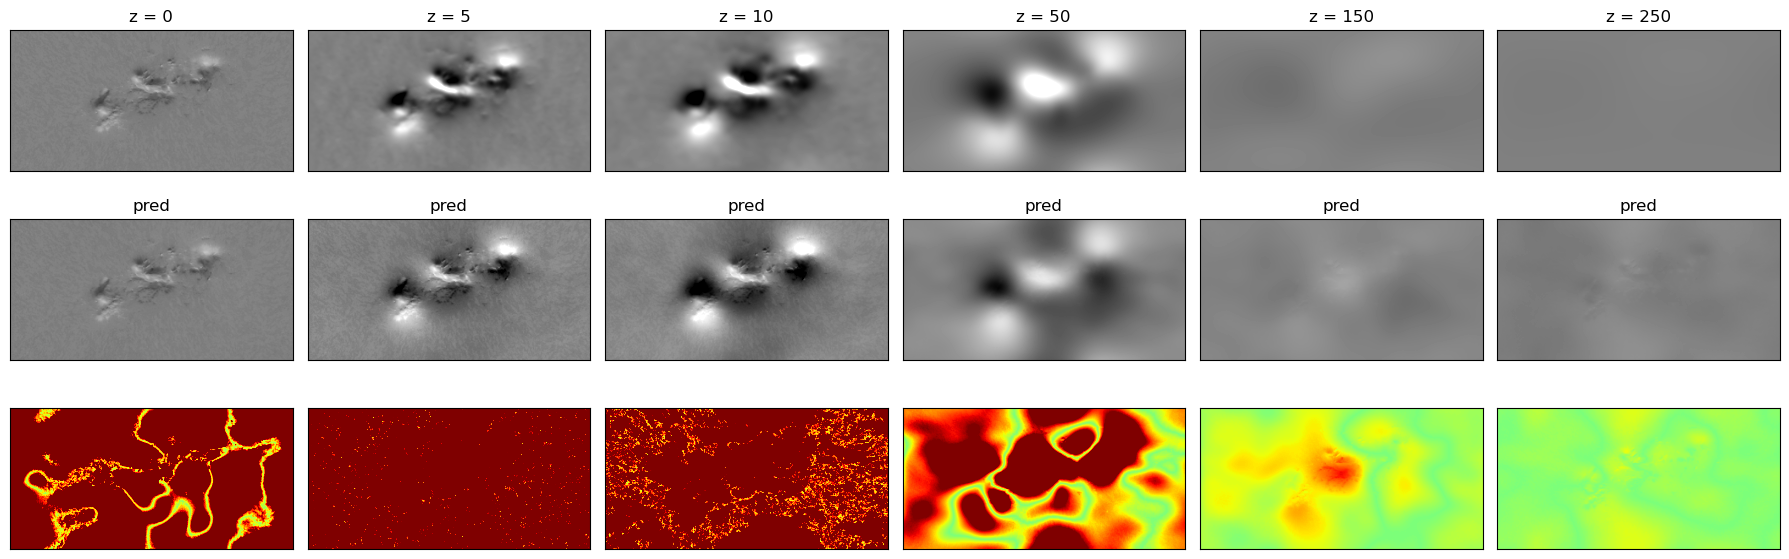

In [34]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 1

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


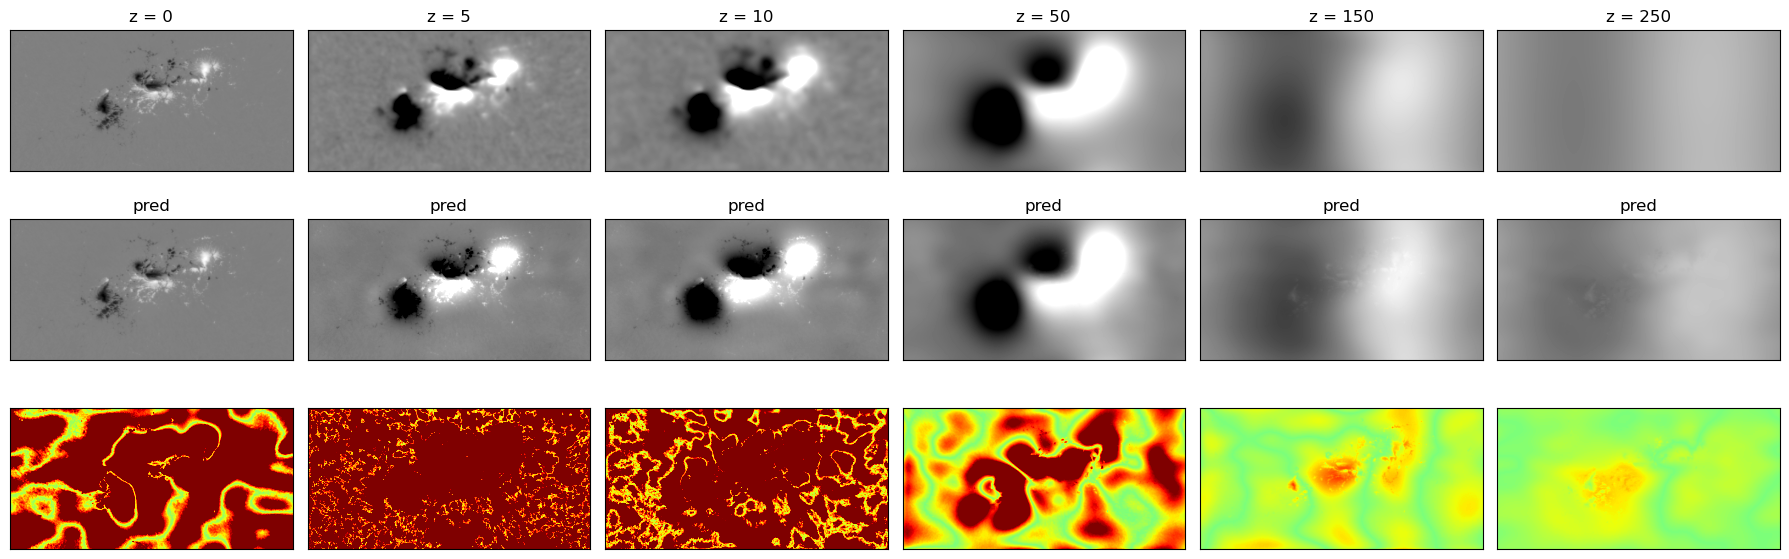

In [35]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 2

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


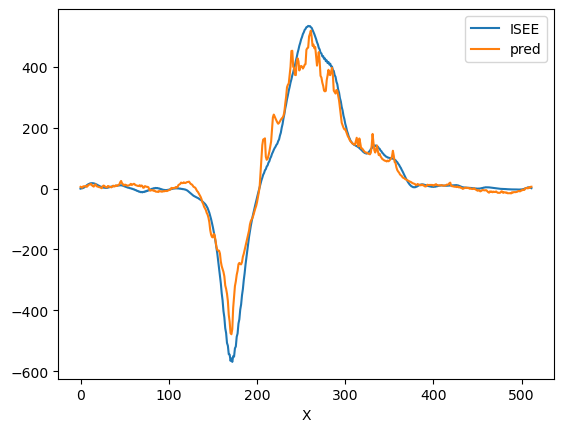

In [85]:
plt.plot(B[:, 128, 10, 2], label='ISEE')
plt.plot(b[:, 128, 10, 2], label='pred')
plt.legend()
plt.xlabel("X")
plt.show()

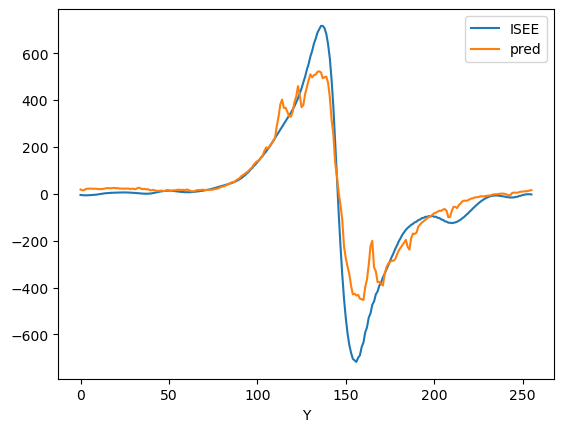

In [83]:
plt.plot(B[256, :, 10, 2], label='ISEE')
plt.plot(b[256, :, 10, 2], label='pred')
plt.legend()
plt.xlabel("Y")
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchmetrics import MeanSquaredError, ConcordanceCorrCoef

In [27]:
z_values = np.arange(b.shape[2])
mse_metrics = []
ccc_metrics = []

for z in z_values:
    mse_metrics.append( MeanSquaredError()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item())
    ccc_metrics.append( ConcordanceCorrCoef()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item() )

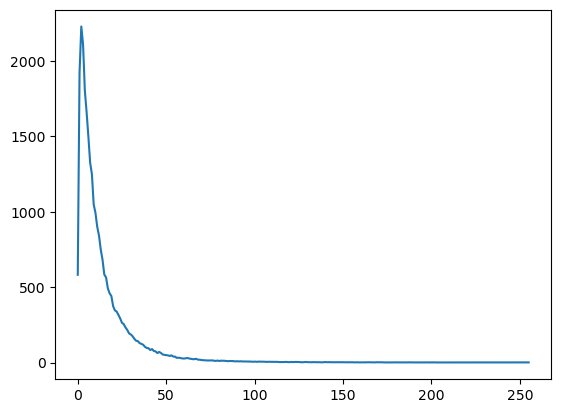

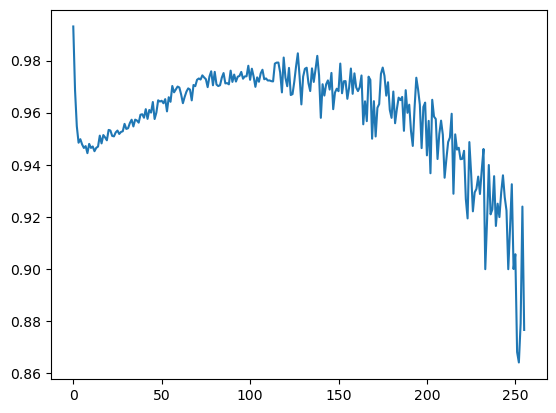

In [29]:
plt.plot(z_values, mse_metrics)
plt.show()

plt.plot(z_values, ccc_metrics)
plt.show()

In [ ]:
plt.plot(B[:, 128, 100, 0], label='ISEE')
plt.plot(b[:, 128, 100, 0], label='PINO')
plt.legend()
plt.xlabel("X")
plt.show()

In [119]:
from scipy.signal import savgol_filter

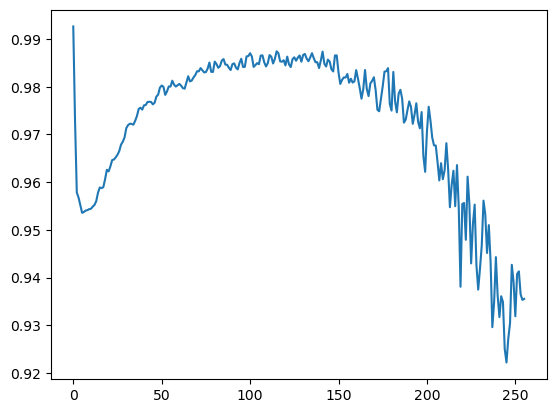

In [120]:
# plt.plot(z_values, ccc_metrics)
plt.plot(z_values, savgol_filter(ccc_metrics, 4, 2))
plt.show()

z=250


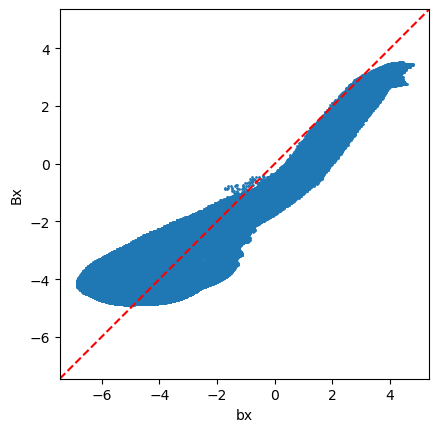

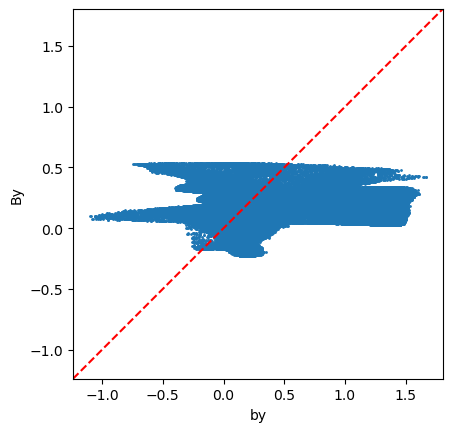

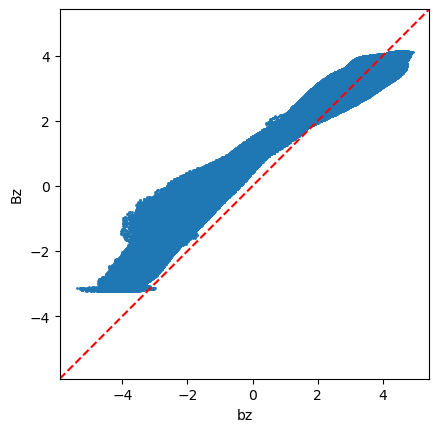

In [121]:
z = 250
n = 1

print(f"z={z}")

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 0].flatten(), B[::n, ::n, z, 0].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bx')
ax.set_ylabel('Bx')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 1].flatten(), B[::n, ::n, z, 1].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('by')
ax.set_ylabel('By')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 2].flatten(), B[::n, ::n, z, 2].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bz')
ax.set_ylabel('Bz')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()